# Trabalho 1 de Cálculo Numérico - Sistemas Lineares e Zero de Funções

- Disciplina: SME0104 - Cálculo Numérico (2024)
- Docente: Cynthia Lage Ferreira
- Data: Abril de 2024

## Autores:

- Laura Fernandes Camargos - NUSP: 13692334
- Vicenzo D´Arezzo Zilio - NUSP : 13671790

Seguem as resoluções dos exercícios propostos pela especificação da atividade.

# Bibliotecas Utilizadas

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import math
import sympy as sp
import time

# Exercício 1:

Discuta, detalhadamente, as diferenças entre as funções func1 e func2 apresentadas abaixo. Comente os códigos, os resultados obtidos e apresente as suas conclusões a partir da aplicação destas duas funções no exemplo abaixo

## Definindo as funções e comparando suas execuções:

In [21]:
def func1(A):
    n = A.shape[0] #A é uma matriz quadrada nxn
    U = A.copy() #cópia de A para U (matriz superior)
    L = np.eye(n) #L é uma matriz identidade (matriz inferior)

    for j in range(n - 1):
        for i in range(j + 1, n): #itera sobre todas as linhas abaixo da diagonal principal
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:n] = U[i, j:n] - L[i, j] * U[j, j:n] #atualizando a linha i de U
    return L, U

def func2(A, p):
    n = A.shape[0] # A é uma matriz quadrada nxn
    U = A.copy() #cópia de A para U (matriz superior)
    L = np.eye(n) #L é uma matriz identidade (matriz inferior)

    for j in range(n - 1):
        v = min(n, j + p + 1) #a variável v controla até qual coluna o loop interno deve ocorrer para cada coluna j
        for i in range(j + 1, v): #itera sobre as linhas limitadas pelo v
            L[i, j] = U[i, j] / U[j, j]
            U[i, j:v] = U[i, j:v] - L[i, j] * U[j, j:v]
    return L, U

In [22]:
# Gerando uma matriz aleatória 2000x2000

n = 20
A = np.random.rand(n, n)

# Testando a função func2 com diferentes valores de p
p_values = [1, 5, 10, 50, 100]
start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print("Time taken by func1:", end_time - start_time)

for p in p_values:
    start_time = time.time()
    (L, U) = func2(A, p)
    end_time = time.time()
    print("Time taken by func2:", end_time - start_time)

Time taken by func1: 0.0015861988067626953
Time taken by func2: 0.00023221969604492188
Time taken by func2: 0.0006394386291503906
Time taken by func2: 0.001046895980834961
Time taken by func2: 0.0013151168823242188
Time taken by func2: 0.00133514404296875


In [23]:
n = 2000
p = 2
A = np.zeros((n, n)) # A é inicializada com zeros

for i in range(n):
    for j in range(max(0, i - p), min(n, i + p + 1)):
        A[i, j] = np.random.normal() # cada elemento de A é preenchido com valores random apenas nas posições em torno da diagonal principal

start_time = time.time()
(L, U) = func1(A)
end_time = time.time()
print("Time taken by func1:", end_time - start_time)

start_time = time.time()
(L, U) = func2(A, p)
end_time = time.time()
print("Time taken by func2:", end_time - start_time)

print("Norm of L@U - A for func1:", np.linalg.norm(L @ U - A))
print("Norm of L@U - A for func2:", np.linalg.norm(L @ U - A))

Time taken by func1: 14.100438356399536
Time taken by func2: 0.03867292404174805
Norm of L@U - A for func1: 5.620560563500735e-13
Norm of L@U - A for func2: 5.620560563500735e-13


## Diferenças:

A princípio as duas funções possuem a mesma funcionalidade: realizar decomposição LU de uma matriz quadrada A. A decomposição LU fatora a matriz A em duas matrizes, uma matriz triangular inferior L e uma matriz triangular superior U, tal que A = LU.

###**Func1**:

* Implementa o algoritmo padrão de decomposição LU.

* Itera sobre todas as colunas da matriz e sobre todas as linhas abaixo da diagonal principal para calcular os elementos da matriz L e atualizar a matriz U.

###**Func2**:

* Implementa a decomposição LU, mas tem um parâmetro adicional p, que permite controlar o alcance das operações realizadas em cada iteração.

* Limita o range do for interno para cada coluna, considerando apenas as linhas até j+p+1, onde j é a coluna atual.

O parâmetro p representa o range das operações realizadas em cada iteração do for interno. Ao limitar o alcance para cada coluna, evita-se o processamento de elementos que podem não ser essenciais para a decomposição LU, resultando em uma melhor performance, principalmente em casos onde p é escolhido de forma apropriada.

Por exemplo, quando p é menor, o range das operações é reduzido, o que significa que menos entradas da matriz são consideradas durante a decomposição LU.

Quando p é maior, o alcance das operações realizadas em cada iteração do loop interno é aumentado. Isso significa que mais entradas da matriz são consideradas para o cálculo dos elementos de L e U, o que teoricamente aumenta o tempo de execução e torna a convergência mais precisa.

Sendo assim, a principal diferença é que a **func1** itera sobre todas as colunas da matriz e sobre todas as linhas abaixo da diagonal principal para convergir enquanto a **func2**  limita essa iteração para cada coluna, o que resulta em uma redução no número de operações realizadas e, consequentemente, em uma possível melhoria no desempenho para matrizes desse tipo. Entretanto, é importante notar que essa diferença pode não ser observada em todos os casos. O desempenho relativo das duas funções depende de fatores como o tamanho e a densidade da matriz e o valor de p escolhido.


## Resultados Obtidos
Tendo em vista os resultados obtidos é possível compará-los e analisá-los segundo critérios como **tempo de execução, erro de reconstrução e eficiência de cada função.**

### **Tempo de execução:**
O tempo de execução da func2 é significativamente menor do que o tempo de execução da func1. A limitação do intervalo de iteração na func2 reduz o número de cálculos realizados em comparação com a func1 e isso sugere que a implementação da **func2** é mais eficiente em termos de desempenho computacional para casos específicos. É possível deduzir que na maioria dos casos, a **func2** tende a ter um tempo de execução menor do que a **func1**, devido à limitação do alcance das operações realizadas em cada iteração do loop interno. Essa redução no número de operações pode levar a uma execução mais rápida do algoritmo.

### **Erro de Reconstrução:**
Ao calcular a norma da diferença entre a matriz original A e a reconstrução  L×U, observamos que o erro é da ordem de e−13 para ambas as funções. Isso indica que ambas as implementações produzem resultados muito próximos da matriz original, garantindo uma boa precisão na decomposição LU.

### **Eficiência:**
A **func2** parece ser superior em termos de tempo de execução sem comprometer a precisão. Portanto, se a eficiência computacional for uma consideração importante e a precisão for mantida, a **func2** seria a escolha preferencial.


Em geral, a eficácia da **func2** pode variar dependendo das características da matriz e das necessidades específicas do problema. Por exemplo, se a matriz for esparsa ou tiver um padrão de distribuição específico, pode ser necessário ajustar o parâmetro p de forma diferente para obter os melhores resultados em termos de tempo de execução e precisão.

##Conclusão:

Em resumo, a função **func2** é uma versão otimizada da **func1**, onde o parâmetro p permite controlar o range das operações realizadas em cada iteração.

Um ponto observado é que na **func2** a matriz A é inicializada com zeros e apenas as entradas em torno da diagonal principal são modificadas com valores aleatórios, ou seja, as entradas que não são alcançadas pelo parâmetro  p permanecerão como zeros durante o processo de decomposição LU. Por outro lado, a **func1** irá atualizar todas as entradas de L e U, mesmo aquelas que são zeros na matriz original A. Isso ocorre porque não há um mecanismo para limitar o alcance da iteração, como é feito na função **func2** com o parâmetro p.

Sendo assim, é importante ressaltar que a **func2** não será a melhor função em todos os casos, uma vez que a razão pela qual a função converge no exemplo fornecido é porque ela manipula a matriz de forma que as entradas que não são alcançadas pelo parâmetro p, fazendo com que as partes "relevantes" da matriz sejam consideradas durante a decomposição LU.

A escolha entre as duas funções depende do contexto específico e dos requisitos de desempenho e precisão do problema em questão. Se a matriz for grande e o parâmetro
p puder ser escolhido adequadamente para limitar o número de operações, a função func2 pode ser preferível. Caso contrário, a função func1 pode ser mais apropriada.

# Exercício 2:

Dada a matriz esparsa:


```
A =([[4, -2, 1, 0, 0, 0],
     [-2, 7, -2, 1, 0, 0],
     [1, -2, 7, -2, 1, 0],
     [0, 1, -2, 7, -2, 1],
     [0, 0, 1, -2, 7, -2],
     [0, 0, 0, 1, -2, 4]])
```
 considere o sistema Ax=b, em que

```
b = ([-1, -2, 1, 1, -2, -1])^T.```

## a) Um método iterativo pode ser escrito na forma $x^{k+1} = Cx ^{k} + g, \space k≥0$. Escreva as matrizes de iteração $C_j$ e $C_{gs}$ e os vetores $G_j$ e $G_{gs}$ dos métodos de Gauss-Jacobi e Gauss-Seidel, respectivamente.

### Obtendo as Matrizes:

Primeiramente, é preciso mostrar como chegar em ($x^{k+1} =Cx ^k + g$) a partir de:

\\


$$
Ax = b
$$

\\

Usando uma matriz diagonal $D$ composta pelos elementos da diagonal de $A$, ou seja, $D$ é uma matriz onde todos os elementos fora da diagonal principal são zero, podemos reescrever $Ax = b$ como:

$$
(A - D + D)x = b,
$$

\\

Reescrevendo essa equação como:
$$
(A − D)x^k + Dx^{k+1} = b, \space k : iterações
$$

\\

Reorganizando a equação, ou seja, resolvendo uma equação para a próxima iteração $x^{k+1}$ em termos da iteração atual $x^k$ obtemos que:

$$
Dx^{k+1} = (D − A)x^{k} + b \space ,
$$

\\

Podendo,finalmente, ser escrita como $x^{k+1} = Cx^{k} + g$, onde:

\\

*   $C = D^{-1}(D − A) \Rightarrow C = I - D^{-1}A$
*   $g = D^{-1}b$

In [24]:
# declarando a matriz A e o vetor b
A = np.array([[4, -2, 1, 0, 0, 0],
              [-2, 7, -2, 1, 0, 0],
              [1, -2, 7, -2, 1, 0],
              [0, 1, -2, 7, -2, 1],
              [0, 0, 1, -2, 7, -2],
              [0, 0, 0, 1, -2, 4]])

b = np.array([-1, -2, 1, 1, -2, -1])

def gauss_jacobi_matrizes(A):
    n = A.shape[0] # n = 6 nesse caso
    D = np.diag(np.diag(A)) # matriz diagonal D com a diagonal principal = diagonal principal de A
    C = np.eye(n) - np.linalg.inv(D) @ A # C = I - D⁻¹A -> matriz identidade (D⁻¹D) - inversa de D x A
    g = np.linalg.inv(D) @ b # g = D⁻¹b -> inversa de D x vetor b
    return C, g

Cj, Gj = gauss_jacobi_matrizes(A)

print("Matriz de iteração Cj (Gauss-Jacobi):")
print(Cj)
print("\nVetor Gj:")
print(Gj)

Matriz de iteração Cj (Gauss-Jacobi):
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.28571429  0.          0.28571429 -0.14285714  0.          0.        ]
 [-0.14285714  0.28571429  0.          0.28571429 -0.14285714  0.        ]
 [ 0.         -0.14285714  0.28571429  0.          0.28571429 -0.14285714]
 [ 0.          0.         -0.14285714  0.28571429  0.          0.28571429]
 [ 0.          0.          0.         -0.25        0.5         0.        ]]

Vetor Gj:
[-0.25       -0.28571429  0.14285714  0.14285714 -0.28571429 -0.25      ]


Segundo, é preciso mostrar como chegar em $x^{k+1} =Cx^{k} + g$ a partir de $Ax = b$, considerando $A = L + R$.

\\

L é uma matriz triangular inferior de A e R é matriz triangular superior de A sem a diagonal principal.
Reescrevendo $Ax = b$ como $L + R)x = b$, não alteramos o valor da expressão.

\\

Sendo assim:
$$
Lx + Rx = b \implies Lx^{k+1} = b - Rx^k \space ,
$$

\\
Onde $x^k$ e $x^{k+1}$ são as soluções nas $k$ iterações. Isolando o $x^{k+1}$ e multiplicando os dois lados da equação por $L^{-1}$ obtemos:

\\

$$x^{k+1} = (-L^{-1}R)x^k + L^{-1}b \space ,$$

\\

Onde:

*   $C = -L^{1}R$
*   $g = L^{-1}b$


In [25]:
def gauss_seidel_matrizes(A, b):
    n = A.shape[0]  #n = 6 nesse caso
    L = np.tril(A)  #matriz triangular inferior de A
    R = np.triu(A, 1) #matriz triangular superior de A sem a diagonal principal
    C = -np.linalg.inv(L) @ R #C = -inversa de L x R
    g = np.linalg.inv(L) @ b #g = inversa de L x vetor b
    return C, g

Cgs, Gs = gauss_seidel_matrizes(A, b)

print("Matriz de iteração Cgs (Gauss-Seidel):")
print(Cgs)
print("\nVetor Gs:")
print(Gs)


Matriz de iteração Cgs (Gauss-Seidel):
[[ 0.          0.5        -0.25        0.          0.          0.        ]
 [ 0.          0.14285714  0.21428571 -0.14285714  0.          0.        ]
 [ 0.         -0.03061224  0.09693878  0.24489796 -0.14285714  0.        ]
 [ 0.         -0.02915452 -0.00291545  0.09037901  0.24489796 -0.14285714]
 [ 0.         -0.00395668 -0.01468138 -0.00916285  0.09037901  0.24489796]
 [ 0.          0.00531029 -0.00661183 -0.02717618 -0.01603499  0.15816327]]

Vetor Gs:
[-0.25       -0.35714286  0.07653061  0.21574344 -0.23500625 -0.42143898]


## b) Verifique se os métodos de Gauss-Jacobi e Gauss-Seidel obtidos no item anterior convergem

### Convergência de Métodos Iterativos para Sistemas Lineares

Estudar a convergência dos métodos é provar sua efetividade independentemente da escolha de um ponto de partida arbitrário.


No caso de Gauss-Jacobi e também no método de Gauss-Seidel - *métodos iterativos de solução de sistemas lineares*, isso pode ser feito utilizando **Método das Diagonais,** uma ferramenta analítica que verifica se a matriz de coeficientes ($A$) é diagonalmente estritamente dominante.

$$
\frac{\sum_{i \neq j}^{n} a_{ij}}{|a_{ii}|} < 1 \space, \space \forall i = 1, \space ..., n
$$


Pela definição do critério de convergência dos métodos citados, provar que a matriz de coeficientes é diagonalmente estritamente dominante é suficiente para garantir que a sequência de resultados converge à solução do sistema $A \vec{x} = b$.

In [26]:
def verify_convergence(matrix) -> bool:

    for i in range(len(matrix)):

        line = sum( abs(matrix[i, j]) for j in range(len(matrix)) if i != j )

        if abs(matrix[i, i]) <= line:
          print(f"line {i} breaks the criterion")
          return False

    return True

In [27]:
print(f"""\tAplicando o método das diagonais à matriz A:
        -> A é diagonalmente estritamente dominante? {verify_convergence(A)}""")

	Aplicando o método das diagonais à matriz A:
        -> A é diagonalmente estritamente dominante? True


### Conclusão

Logo, como a matriz de coeficiente passa pelo método das diagonais, ambos os Métodos irão convergir à solução independente da escolha inicial de $x$.

## c) Resolva numericamente o sistema Ax = b em questão usando os métodos de Gauss-Jacobi e GaussSeidel utilizando erro absoluto inferior a 1e−8 e chute inicial x0 = (1, 0, 0, 0, 0, 0). Discuta os resultados obtidos. Faça um gráfico erro X iterações.

In [28]:
def gauss_jacobi(A, b, x0, tol):
    n = A.shape[0]
    D = np.diag(np.diag(A))
    C = np.eye(n) - np.linalg.inv(D) @ A
    g = np.linalg.inv(D) @ b
    kmax = 10000
    k = 0
    errors = []  #lista para armazenar os erros
    while np.linalg.norm(b - A @ x0) > tol and k < kmax:
        k += 1
        x_new = C @ x0 + g
        error = np.linalg.norm(x_new - x0)  #calculando erro absoluto
        errors.append(error)
        x0 = x_new
    if k == kmax:
        print('Erro: o método não converge.')
        return None, None, None
    return x0, k, errors

def gauss_seidel(A, b, x0, tol):
    L = np.tril(A)
    R = np.triu(A, 1)
    C = -np.linalg.inv(L) @ R
    g = np.linalg.inv(L) @ b
    kmax = 10000
    k = 0
    errors = []  #lista para armazenar os erros
    while np.linalg.norm(b - A @ x0) > tol and k < kmax:
        k += 1
        x_new = C @ x0 + g
        error = np.linalg.norm(x_new - x0)  #calculando o erro absoluto
        errors.append(error)
        x0 = x_new
    if k == kmax:
        print('Erro: o método não converge.')
        return None, None, None
    return x0, k, errors

In [29]:

A = np.array([[4, -2, 1, 0, 0, 0],
              [-2, 7, -2, 1, 0, 0],
              [1, -2, 7, -2, 1, 0],
              [0, 1, -2, 7, -2, 1],
              [0, 0, 1, -2, 7, -2],
              [0, 0, 0, 1, -2, 4]])

b = np.array([-1, -2, 1, 1, -2, -1])

#chute inicial e tolerância dadas no enunciado
x0 = np.array([1, 0, 0, 0, 0, 0])
tol = 1e-8

#resolvendo o sistema com Gauss-Jacobi
x_jacobi, k_jacobi, errors_jacobi = gauss_jacobi(A, b, x0, tol)
if x_jacobi is not None and k_jacobi is not None:
    print("Solução Gauss-Jacobi:", x_jacobi)
    print("Iterações Gauss-Jacobi:", k_jacobi)

#resolvendo o sistema com Gauss-Seidel
x_seidel, k_seidel, errors_seidel = gauss_seidel(A, b, x0, tol)
if x_seidel is not None and k_seidel is not None:
    print("\nSolução Gauss-Seidel:", x_seidel)
    print("Iterações Gauss-Seidel:", k_seidel)

Solução Gauss-Jacobi: [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]
Iterações Gauss-Jacobi: 80

Solução Gauss-Seidel: [-0.50442478 -0.39823009  0.22123894  0.22123894 -0.39823009 -0.50442478]
Iterações Gauss-Seidel: 15


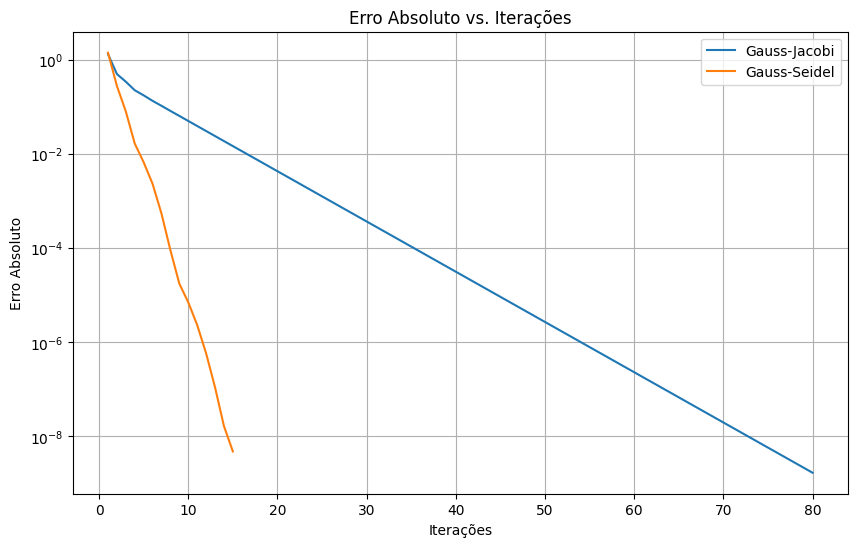

In [30]:
# plotando o gráfico de erro versus iterações
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(errors_jacobi) + 1), errors_jacobi, label='Gauss-Jacobi')
plt.plot(range(1, len(errors_seidel) + 1), errors_seidel, label='Gauss-Seidel')
plt.yscale('log')  #escala logarítmica no eixo y para melhor visualização
plt.xlabel('Iterações')
plt.ylabel('Erro Absoluto')
plt.title('Erro Absoluto vs. Iterações')
plt.legend()
plt.grid(True)
plt.show()

### Discussão sobre os resultados:
Ambos os métodos convergiram para a mesma solução, o que indica que as soluções encontradas são válidas.

O método de Gauss-Seidel convergiu para a solução com um número significativamente menor de iterações (15 iterações) em comparação com o método de Gauss-Jacobi (80 iterações). Isso sugere que o método de Gauss-Seidel converge mais rapidamente para a solução do sistema, uma vez que utiliza as soluções atualizadas das variáveis em cada iteração.

A diferença no número de iterações entre os métodos pode ser explicada pelas diferenças na forma como os métodos atualizam os valores das variáveis. Enquanto o método de Gauss-Jacobi utiliza os valores das variáveis de iterações anteriores em cada iteração, o método de Gauss-Seidel utiliza os valores mais recentes disponíveis, o que pode resultar em uma convergência mais rápida.

Embora ambos os métodos tenham produzido resultados consistentes, o método de Gauss-Seidel demonstrou ser mais eficiente em termos de número de iterações necessárias para convergir para a solução.

# Exercício 3:

A região sombreada do gráfico apresentado a seguir representa o perfil de duas elevações dado pela função $p(x) = −x^4 + 7.7x^3–18x^2 + 13.6x$. Um projétil á lançado a partir da menor elevação e descreve uma curva dada por $q(x) = −x^2 +5x+0.75$. Pede-se determinar a altura na qual ocorre o impacto com a maior elevação.

## a) Modelagem $\mathbb{R} \times \mathbb{R}$ e convergência por Bisseção

- solução representada como a raiz de uma função não linear;
- encontre uma aproximação da solução através método da bisseção;
- realize até 5 iterações;
- precisão de $10^{-3}$ ;

### Estudo do Problema

Retornando ao problema, entende-se que a solução deve representar a Altura em que ocorre a colisão - imagem das funções trajetória ($f_1(t)$ - elevação, $f_2(t)$ - projétil).

Para isso nos concentraremos no problema de encontrar o tempo em que ocorre a colisão, tendo em vista que as funções trajetórias não são invertíveis - não são injetoras.

Nesse sentido, precisamos construir uma nova função (F(h)) sobre o Domínio do tempo de maneira que a Imagem seja zero quando a colisão ocorrer - diferença de posição entre as trajetórias.

- $dom(F(t))$ : tempo $⇔ \mathbb{N}$
- $F(t)$ = $f_2(t) - f_1(t)$
- $Im(F(t))$ : $\mathbb{R}$

Vale dizer que no caso, valores negativos não representam casos reais da situação, tendo em vista que o projétil não atravessa a elevação. Porém, **para a utilização do método da Bisseção, precisamos garantir que a função cuja raiz é aproximada mude, ao menos uma vez, de sinal**.

Portanto:
$$
F(t) = (−x^2 +5x+0.75) - (−x^4 + 7.7x^3–18x^2 + 13.6x) \\
⇔ x^4 - 7.7x^3 + 17x^2 - 8.6x + 0.75 ;
$$

In [31]:
def f1(x):
    return -x**2 + 5*x + 0.75

def f2(x):
    return -x**4 + 7.7*x**3 - 18*x**2 + 13.6*x

def F(x):
    return x**4 - 7.7 * x**3 + 17 * x**2 - 8.6 * x + 0.75

In [32]:
def plot_function(f, x_min, x_max, y_min, y_max, str_func):

    num_points = 10000
    x = np.linspace(x_min, x_max, num_points)
    y = f(x)

    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label=str_func)
    plt.xlabel('tempo')
    plt.ylabel('f(t)')
    plt.title('Gráfico de ' + str_func)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.legend()
    plt.show()

def plot_double_functions(f1, f2, f3, x_min, x_max, y_min, y_max, str_f1, str_f2, str_f3):

    num_points = 10000
    x = np.linspace(x_min, x_max, num_points)
    y1 = f1(x)
    y2 = f2(x)
    y3 =f3(x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, y1, label=str_f1, color='blue')
    plt.plot(x, y2, label=str_f2, color='red')
    plt.plot(x, y3, label=str_f3, color='purple')
    plt.xlabel('tempo')
    plt.ylabel('f(t)')
    plt.title('Gráfico de ' + str_f1 + str_f2 +' e ' + str_f2)
    plt.ylim(y_min, y_max)
    plt.grid(True)
    plt.legend()
    plt.show()


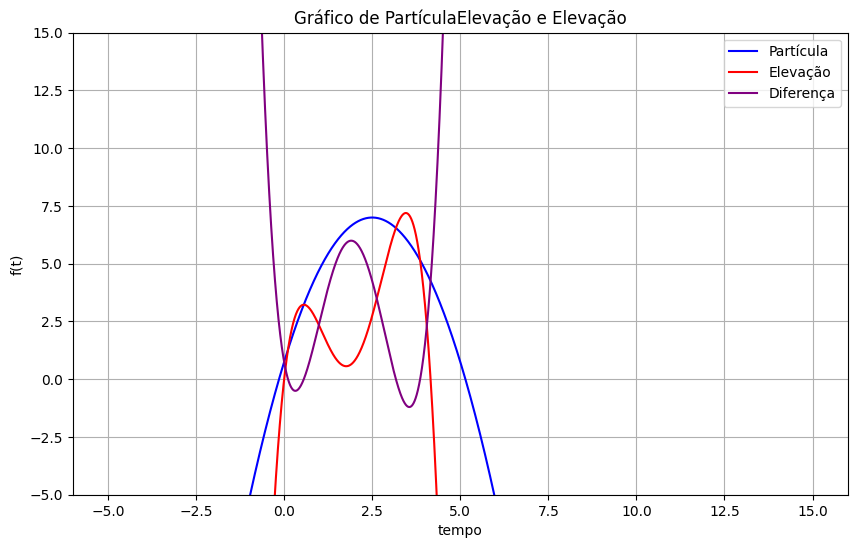

In [33]:
plot_double_functions(f1, f2, F, -5, 15, -5, 15, "Partícula", "Elevação", "Diferença")

Plotando a função diferença de posição ($F(x)$),  podemos observar que o intervalo que desejamos estudar é o intervalo que circunda entre a segunda e a terceira raiz ($\alpha_2, \alpha_3$).

A conclusão decorre da observação feita na modelagem quanto ao sinal e do estudo da positividade da imagem nos intervalos entre as raízes:

Para $t \in (\alpha_2, \alpha_3) \rightarrow F(t) > 0$ ;

### Método de Cálculo das raízes: Bisseção

Como a função é contínua e muda de sinal no intervalo de análise, podemos utilizar o método.


In [34]:
def bissection_method(f, a, b, threshold= 10**(-3)):

    counter = 0

    erro = math.inf
    x = (a + b)/2


    while erro > threshold:

        counter = counter + 1

        if f(a)*f(x) < 0:
            b = x
        else:
            a = x

        x0 = x
        x = (a+b)/2
        erro = abs(x - x0)

    return x, counter


Se desejamos descobrir o impacto com maior elevação, precisamos calcular tanto $\alpha_2$ quanto $\alpha_3$, com o objetivo de estudar a altura inicial e a final.

Para isso, utilizamos o método duas vezes sobre dois intervalos diferentes, condicionando-o a se aproximar de uma raiz desejada por vez.

A precisão do intervalo escolhido é determinante para a velocidade do método. Nesse sentido, utilizou-se da ferramenta de visualização gráfica de funções (gráficos implementados pela biblioteca *MatPlotLib*) para inferir grosseiramente intervalos favoráveis à conversão em 5 iterações.

Para encontrar o intervalo suficientemente preciso, realizou-se o seguinte processo:

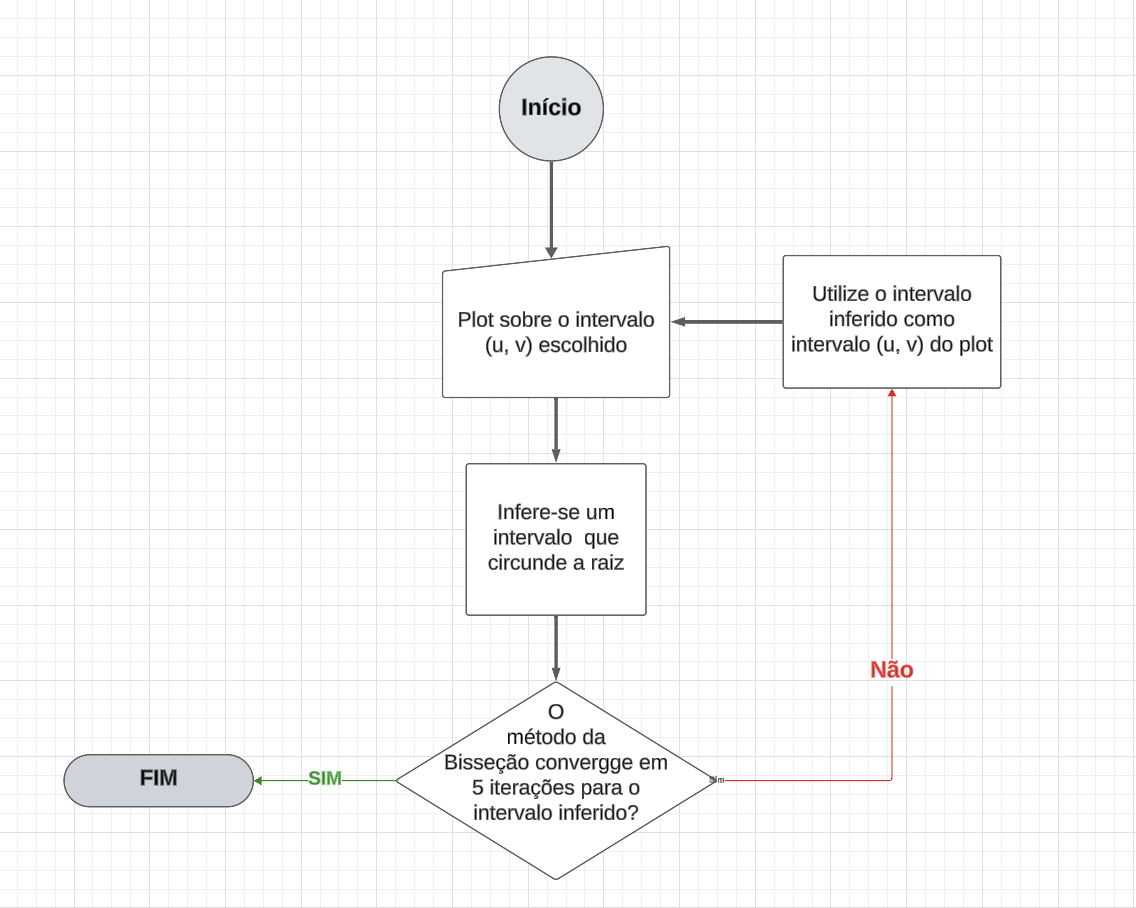

**Intervalos Obtidos**:

- $\alpha_2$: (0.55, 0.6);
- $\alpha_3$: (3.15, 3.2);


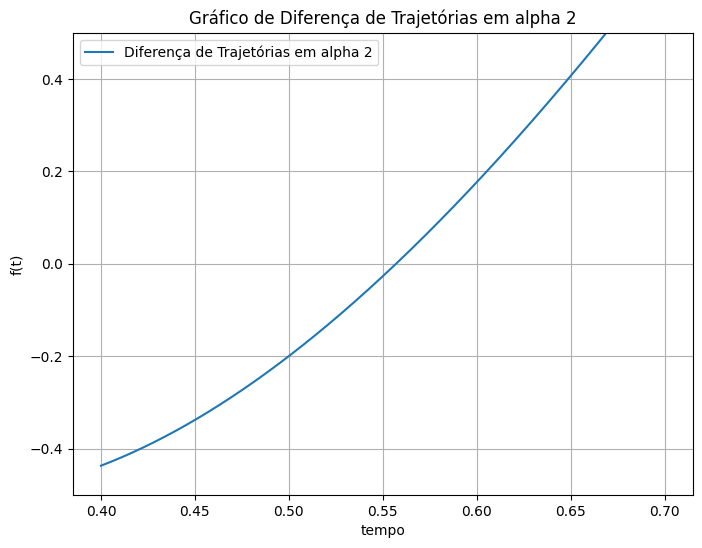

In [35]:
plot_function(F, 0.4, 0.7, -0.5, 0.5, "Diferença de Trajetórias em alpha 2")

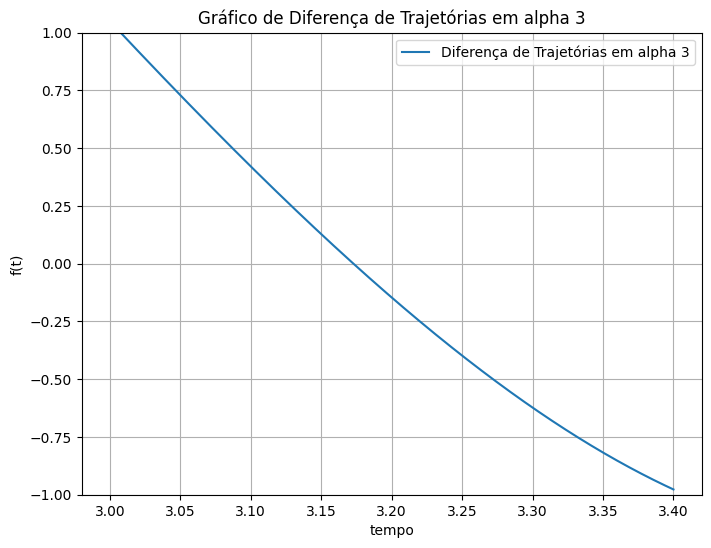

In [36]:
plot_function(F, 3, 3.4, -1, 1, "Diferença de Trajetórias em alpha 3")

### Finalização:

Tendo em vista que encontramos o tempo, basta observar a imagem de uma das funções em ambos os valores:

In [37]:
t1, it_1 = bissection_method(F, 0.55, 0.6)
t2, it_2 = bissection_method(F, 3.15, 3.2)


print(f"tempo de lançamento {t1} em {it_1} iterações")
print(f"tempo de lançamento {t2} em {it_2} iterações")
print("Altura de lançamento " + str(f1(t1)))
print("Altura de colisão " + str(f2(t2)))

tempo de lançamento 0.5570312500000001 em 5 iterações
tempo de lançamento 3.17265625 em 5 iterações
Altura de lançamento 3.224872436523438
Altura de colisão 6.546101510113125


Observe que os resultados são proporcionais ao observado no "Gráfico de Partícula e Elevação" plotado acima. Logo, **o impacto com maior elevação ocorre na altura 6.546101510113125 de unidades de grandeza genéricas utilizadas**.

## b) Modelagem $\mathbb{R}^2 \times \mathbb{R}^2$  e Convergência por método de Newton

O objetivo agora é ser capaz de modelar o problema de modo que os tempos de colisão sejam as raízes de uma função $\mathbb{R}^2 \times \mathbb{R}^2$.

- precisão de $10^{-3}$ ;

### Estudo do problema

Um sistema de equações pode ser representado como uma função multi-dimensional da seguinte forma:

$$
\vec{F(t)} = (f_1(t), ..., f_n(t))^T
$$

\\

Nesse sentido, sobre o contexto do método de Newton, podemos utilizar a **Função Diferença de Trajetória - F(t)**.

O método consiste na definição de uma função $\varphi(x)$ em cima da função estudada e sua derivada de forma que:

\\

$$
φ(x_i) = x_i ⇔ F(x_i) = 0
$$

\\

Portanto, podemos interpretar o método de newton como um sistema de quações que represente a interseção entre $\varphi(x)$ e o eixo x:

\\

$$
F : \mathbb{R}^2 → \mathbb{R}^2 \space | \space \vec{F}(y, t) = (y = \varphi(t), y = 0)^T
$$

\\


Logo, basta calcularmos a função $\varphi(x)$ e definir um valor arbitrário para iniciar o método e, por fim, encontrar as raizes e as imagens.

### Cálculo de φ(t) para o método de newton

$$
φ(t) := t - \frac{F(t)}{F'(t)}
$$

INSERT CONDICOES

In [38]:
def newton_method(func, x0, threshold, kmax):

    x = sp.symbols('x')

    print(f"k:0 | x:{x0}")

    diff = sp.diff(F(x), x)

    for k in range(1, kmax+1):
        dx = func(x0)/diff.subs(x, x0)
        x0 = x0 - dx

        print(f"k:{k} | x:{x0}")

        if abs(dx) < threshold:
            return x0, k

    print("error in kmax")

    return


Agora precisamos ser capazes de escolher um chute inicial interessante para cada uma das raízes que desejamos nos aproximar ($α_2$ e $α_3$).

Para isso, iremos utilizar o início de cada intervalo utilizado no item a:

- $α_2$ : 0.55
- $\alpha_3$: 3.15



In [39]:
x1, _ = newton_method(F, 0.5, 10**(-3), 5)

k:0 | x:0.5
k:1 | x:0.564000000000000
k:2 | x:0.557159542605188
k:3 | x:0.557087891278806


In [40]:
x2, _ = newton_method(F, 3.2, 10**(-3), 5)

k:0 | x:3.2
k:1 | x:3.17230652503794
k:2 | x:3.17291602778670


In [41]:
print(f"Alturas das colisões: {str(f1(x1))} e {str(f1(x2))}")

Alturas das colisões: 3.22509253778456 e 6.54718401954776


## Conclusão:

- sobre os métodos:

Durante o exercício entende-se que o método da bisseção é menos eficiente em termos de velocidade de convergência dado a natureza do problema.

Nesse caso, isso acontece principalmente pela natureza do "input" de cada método. Enquanto para o método da bisseção é necessário definir um intervalo inicial, no método de Newton é apenas um ponto.

Sobre as limitações utilizadas, foram necessárias mais de uma análise do gráfico da função para definir um intervalo suficiente para a bisseção. Enquanto, no método de Newton, não precisamos de tanta precisão.

- sobre os resultados:

Embora diferentes, podemos oberservar que os números são equivalentes dado o erro utilizado: $10^{-3}$:

In [42]:
print(f"""\tHá equivalência?\n
        -> primeira raiz: {f1(t1)} (bisseção) - {f1(x1)} (Newton) = {f1(t1) - f1(x1)}
        -> segunda raiz: {f1(t2)} (bisseção) - {f1(x2)} (Newton) = {f1(t2) - f1(x2)}
        -> conclusão: {f1(t1) - f1(x1)} e {f1(t2) - f1(x2)} < 0.001 ? {(f1(t1) - f1(x1) < 0.001) & (f1(t2) - f1(x2) < 0.001)}""")

	Há equivalência?

        -> primeira raiz: 3.224872436523438 (bisseção) - 3.22509253778456 (Newton) = -0.000220101261124039
        -> segunda raiz: 6.547533569335936 (bisseção) - 6.54718401954776 (Newton) = 0.000349549788172254
        -> conclusão: -0.000220101261124039 e 0.000349549788172254 < 0.001 ? True
